<a href="https://colab.research.google.com/github/BrunoAnalytics/Bruno/blob/main/Saga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#acessando o google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#instalandoa as blibliotecas
!pip install SpeechRecognition
!pip install pydub
!pip install watchdog
!python -m spacy download pt_core_news_sm





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
#Procurando se existe arquivo mp3 na pasta SAGA
import os

saga_folder = "/content/drive/My Drive/SAGA"
mp3_files = [f for f in os.listdir(saga_folder) if f.endswith(".mp3")]

if mp3_files:
    print("Arquivos MP3 encontrados na pasta SAGA.")
else:
    print("Nenhum arquivo MP3 encontrado na pasta SAGA.")


Arquivos MP3 encontrados na pasta SAGA.


In [4]:
#Se ouver arquivo em mp3 converter para wav
import os
from pydub import AudioSegment

def convert_mp3_to_wav(mp3_folder):
    mp3_files = [f for f in os.listdir(mp3_folder) if f.endswith(".mp3")]
    if not mp3_files:
        print("Nenhum arquivo MP3 encontrado na pasta.")
        return

    for mp3_file in mp3_files:
        mp3_path = os.path.join(mp3_folder, mp3_file)
        wav_file = os.path.splitext(mp3_file)[0] + ".wav"
        audio = AudioSegment.from_mp3(mp3_path)
        audio.export(wav_file, format="wav")
        print(f"Arquivo MP3 '{mp3_file}' convertido para WAV.")

# Caminho para a pasta SAGA no Google Drive
saga_folder = "/content/drive/My Drive/SAGA"

# Use a função convert_mp3_to_wav para converter todos os arquivos MP3 na pasta SAGA
convert_mp3_to_wav(saga_folder)


Arquivo MP3 'Audio.mp3' convertido para WAV.


In [36]:
#procurando se tem masi aquivos wav na pasta SAGA
import os

def get_wav_files(folder_path):
    """Retorna uma lista de caminhos para os arquivos WAV na pasta especificada."""
    wav_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".wav")]
    return wav_files

# Caminho para a pasta SAGA no Google Drive
saga_folder = "/content/drive/My Drive/SAGA"

# Obter os arquivos WAV na pasta SAGA
wav_files = get_wav_files(saga_folder)
print("Arquivos WAV na pasta SAGA:", wav_files)


Arquivos WAV na pasta SAGA: ['/content/drive/My Drive/SAGA/seu_audio.wav']


In [6]:
#Transcrevendo oa áudios
import speech_recognition as sr

def transcribe_wav(wav_file):
    """Transcreve o áudio do arquivo WAV para texto."""
    recognizer = sr.Recognizer()

    with sr.AudioFile(wav_file) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data, language="pt-BR")

    return text

# Transcrever o áudio do arquivo WAV encontrado na pasta SAGA
wav_file_path = "/content/drive/My Drive/SAGA/seu_audio.wav"
texto_transcrito = transcribe_wav(wav_file_path)
print("Texto transcrito:", texto_transcrito)


Texto transcrito: fala pessoal beleza aqui é o Caio diretor de operações aqui da saga tô gravando esse áudio aqui para servir como açoite para vocês mesmos durante o processo seletivo tá então botão no desafio 3 vocês vão utilizar esse esse material aqui para poder transcrever de automação e depois conseguir fazer um resumo também tudo automatizado e bom desejo toda sorte para vocês no processo vou só falar mais um pouquinho aqui sobre a saga que aí o áudio fica mais longo e Vocês conseguem fazer todos os testes necessários Beleza então bom nós somos a saga somos uma uma consultoria de growth especializada em projetos de dados projetos de automação com inteligência artificial e projeto hacking professor e bom a gente tem uma atuação mundial já já tomamos com players acredito que já em todos os continentes do mundo e bom startups grandes legumes empresas tradicionais e aí tudo isso a gente já conseguiu atuar nesses nossos anos de história e estão buscando justamente alguém muito fera pa

In [7]:
#salvando o texto do audio na planilha, mas na pagina "arquivo de áudio"
import speech_recognition as sr
import gspread
from oauth2client.service_account import ServiceAccountCredentials

def transcribe_wav_and_save(wav_file):
    """Transcreve o áudio do arquivo WAV para texto e salva na planilha do Google Sheets."""
    recognizer = sr.Recognizer()

    with sr.AudioFile(wav_file) as source:
        audio_data = recognizer.record(source)
        texto_transcrito = recognizer.recognize_google(audio_data, language="pt-BR")

    # Salva o texto transcrito na planilha do Google Sheets
    save_to_google_sheets(texto_transcrito)

    return texto_transcrito

def save_to_google_sheets(texto_transcrito):
    """Salva o texto transcrito na planilha do Google Sheets."""
    # Autenticação e abertura da planilha existente
    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
    credentials = ServiceAccountCredentials.from_json_keyfile_name("/content/drive/MyDrive/SAGA/credentials.json", scope)
    gc = gspread.authorize(credentials)

    # Abre a planilha existente
    spreadsheet_key = "1xerHPAUFE_bxw_gjxiX4QeFVPw6qfa4_w_a_tOOV4JY"
    worksheet = gc.open_by_key(spreadsheet_key).get_worksheet(2)  # Página 3 ("Arquivo de Áudio")

    # Encontra a próxima linha vazia na planilha
    next_row = len(worksheet.col_values(1)) + 1

    # Escreve o texto transcrito na próxima linha vazia na primeira coluna
    worksheet.update_cell(next_row, 1, texto_transcrito)
    print("Texto transcrito salvo na planilha com sucesso!")

# Transcrever o áudio do arquivo WAV encontrado na pasta SAGA e salvar na planilha do Google Sheets
wav_file_path = "/content/drive/My Drive/SAGA/seu_audio.wav"
texto_transcrito = transcribe_wav_and_save(wav_file_path)
print("Texto transcrito:", texto_transcrito)


Texto transcrito salvo na planilha com sucesso!
Texto transcrito: fala pessoal beleza aqui é o Caio diretor de operações aqui da saga tô gravando esse áudio aqui para servir como açoite para vocês mesmos durante o processo seletivo tá então botão no desafio 3 vocês vão utilizar esse esse material aqui para poder transcrever de automação e depois conseguir fazer um resumo também tudo automatizado e bom desejo toda sorte para vocês no processo vou só falar mais um pouquinho aqui sobre a saga que aí o áudio fica mais longo e Vocês conseguem fazer todos os testes necessários Beleza então bom nós somos a saga somos uma uma consultoria de growth especializada em projetos de dados projetos de automação com inteligência artificial e projeto hacking professor e bom a gente tem uma atuação mundial já já tomamos com players acredito que já em todos os continentes do mundo e bom startups grandes legumes empresas tradicionais e aí tudo isso a gente já conseguiu atuar nesses nossos anos de história 

In [8]:
#fazendo as peguntas sobre o texto do audio e respondendo
import re

def analyze_text(text):
    """Realiza a análise do texto usando expressões regulares."""
    # Inicializa os resultados
    faz = []
    tipos_projeto = []
    clientes = []
    continentes = []

    # Define padrões de regex para capturar as informações desejadas
    faz_pattern = re.compile(r"(?<=A empresa X realiza\s).*?(?=\.)")
    tipos_projeto_pattern = re.compile(r"(?<=projetos de\s).*?(?=\.)")
    clientes_pattern = re.compile(r"(?<=clientes incluem\s).*?(?=\.)")
    continentes_pattern = re.compile(r"(?<=clientes em todos os continentes,\s).*?(?=\.)")

    # Encontra correspondências no texto
    faz_match = faz_pattern.search(text)
    tipos_projeto_match = tipos_projeto_pattern.search(text)
    clientes_match = clientes_pattern.search(text)
    continentes_match = continentes_pattern.search(text)

    # Adiciona as correspondências aos resultados
    if faz_match:
        faz.append(faz_match.group(0))
    if tipos_projeto_match:
        tipos_projeto.append(tipos_projeto_match.group(0))
    if clientes_match:
        clientes.append(clientes_match.group(0))
    if continentes_match:
        continentes.append(continentes_match.group(0))

    return {
        "faz": faz,
        "tipos_projeto": tipos_projeto,
        "clientes": clientes,
        "continentes": continentes
    }

# Texto de exemplo para análise (substitua pelo texto transcrito)
texto_transcrito = "A empresa X realiza desenvolvimento de software e consultoria em TI para clientes em todo o mundo. Ela atende a projetos de desenvolvimento de aplicativos, websites e sistemas corporativos. Seus clientes incluem empresas de diversos setores, como financeiro, saúde e educação. A empresa tem clientes em todos os continentes,  já em todos os continentes do mundo ."

# Executa a análise do texto
resultado_analise = analyze_text(texto_transcrito)

# Exibe os resultados
print("O que ela faz?", resultado_analise["faz"])
print("Tipos de projeto:", resultado_analise["tipos_projeto"])
print("Clientes atendidos:", resultado_analise["clientes"])
print("Continentes onde está presente:", resultado_analise["continentes"])


O que ela faz? ['desenvolvimento de software e consultoria em TI para clientes em todo o mundo']
Tipos de projeto: ['desenvolvimento de aplicativos, websites e sistemas corporativos']
Clientes atendidos: ['empresas de diversos setores, como financeiro, saúde e educação']
Continentes onde está presente: [' já em todos os continentes do mundo ']


In [24]:
# Instale a biblioteca spaCy
!pip install -U spacy

# Baixe o modelo de língua em português
!python -m spacy download pt_core_news_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.7.0/pt_core_news_sm-3.7.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [31]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import auth
from googleapiclient.discovery import build
import spacy

# Autenticação no Google Docs
def authenticate_google_docs():
    auth.authenticate_user()
    return build('docs', 'v1')

# Função para obter o texto do Google Docs
def get_text_from_google_docs(doc_id):
    service = authenticate_google_docs()
    doc = service.documents().get(documentId=doc_id).execute()
    content = doc.get('body').get('content')
    text = ''.join([p['paragraph']['elements'][0]['textRun']['content'] for p in content])
    return text

# Carregamento do modelo de língua em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Função para extrair os 10 tópicos principais do texto
def get_text_from_google_docs(doc_id):
    """Obtém o texto de um documento do Google Docs."""
    service = authenticate_google_docs()
    doc = service.documents().get(documentId=doc_id).execute()
    content = doc.get('body').get('content')
    text = ''
    for p in content:
        if 'paragraph' in p:
            elements = p['paragraph']['elements']
            for element in elements:
                if 'textRun' in element:
                    text += element['textRun']['content']
    return text



# ID do documento do Google Docs
doc_id = "1vTZm2ogtLjAmMRJ2LR3kbT5NzdAmSoNuqI8Wzy4qKQA"

# Obtém o texto do documento
text = get_text_from_google_docs(doc_id)

# Imprime o texto para verificar se foi obtido corretamente
print("Texto do documento:")
print(text)

# Extrai os 10 tópicos principais do texto
topics = extract_topics(text)

# Imprime os 10 tópicos principais
print("\nTópicos Principais:")
for i, topic in enumerate(topics, 1):
    print(f"Tópico {i}: {topic}")


Texto do documento:
O verão chegou para o mercado cripto. Todos os indícios apontam para um aquecimento da criptoeconomia. No entanto, como todos os demais setores, o mercado cripto tem também seus riscos. Informação de qualidade se destaca como um dos principais fatores para uma jornada de sucesso nessa classe de ativos.
O que é bitcoin? Como se beneficiar desse mercado sem cair em ciladas? No que ficar de olho ao avaliar um ativo digital? A equipe do Estadão Blue Studio, em parceria com o Itaú, publicou hoje o e-book “Manual de Criptoeconomia”, que tem como proposta olhar para as engrenagens básicas da criptoeconomia e indicar, sem pretender ser exaustivo ou definitivo, como o Brasil e o mundo estão avaliando os próximos passos desse setor.
A educação financeira especializada em cripto se faz ainda mais relevante no momento atual de alta no mercado, tendo o bitcoin alcançado mais de 150% de valorização em 2023. Quando olhamos para 2024, a valorização está ainda mais acelerada, com um

In [33]:

#10 perguntas sobre o texto salvo sobre criptomoedas
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import auth
from googleapiclient.discovery import build
import spacy
import random

# Autenticação no Google Docs
def authenticate_google_docs():
    auth.authenticate_user()
    return build('docs', 'v1')

# Função para obter o texto do Google Docs
def get_text_from_google_docs(doc_id):
    service = authenticate_google_docs()
    doc = service.documents().get(documentId=doc_id).execute()
    content = doc.get('body').get('content')
    text = ''
    for p in content:
        if 'paragraph' in p:
            elements = p['paragraph']['elements']
            for element in elements:
                if 'textRun' in element:
                    text += element['textRun']['content']
    return text

# Carregamento do modelo de língua em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Função para extrair os 10 tópicos principais do texto
def extract_topics(text):
    doc = nlp(text)
    topics = {}
    for entity in doc.ents:
        if entity.label_ == 'NOUN':
            key = entity.text.lower().strip()
            topics[key] = topics.get(key, 0) + 1
    sorted_topics = sorted(topics.items(), key=lambda x: x[1], reverse=True)
    return [topic[0] for topic in sorted_topics[:10]]

# Função para gerar perguntas com base no texto
def generate_questions(text):
    # Processa o texto com spaCy
    doc = nlp(text)
    # Inicializa uma lista para armazenar as palavras-chave
    keywords = []
    # Extrai os substantivos do texto
    for token in doc:
        if token.pos_ == 'NOUN':
            keywords.append(token.text)
    # Escolhe aleatoriamente 10 palavras-chave
    selected_keywords = random.sample(keywords, min(len(keywords), 10))
    questions = []
    # Gera perguntas com base nas palavras-chave selecionadas
    for keyword in selected_keywords:
        # Substitui "<PALAVRA-CHAVE>" pela palavra-chave no modelo de pergunta
        question_templates = [
            f"O que é {keyword}?",
            f"Quais são os benefícios de {keyword}?",
            f"Como {keyword} impacta nossa vida diária?",
            f"Quais são os desafios associados a {keyword}?",
            f"Quais são algumas aplicações práticas de {keyword}?",
            f"Por que é importante entender {keyword}?",
            f"Quais são as tendências atuais relacionadas a {keyword}?",
            f"Como podemos melhorar nosso conhecimento sobre {keyword}?",
            f"Quais são as implicações de longo prazo de {keyword}?",
            f"Quais são algumas soluções propostas para os problemas relacionados a {keyword}?"
        ]
        # Escolhe aleatoriamente uma pergunta para a palavra-chave
        question = random.choice(question_templates)
        questions.append(question.replace("<PALAVRA-CHAVE>", keyword))
    return questions

# ID do documento do Google Docs
doc_id = "1vTZm2ogtLjAmMRJ2LR3kbT5NzdAmSoNuqI8Wzy4qKQA"

# Obtém o texto do documento
text = get_text_from_google_docs(doc_id)

# Gerar perguntas com base no texto
questions = generate_questions(text)

# Imprime as perguntas
print("\nPerguntas geradas com base no texto:")
for i, question in enumerate(questions, 1):
    print(f"Pergunta {i}: {question}")



Perguntas geradas com base no texto:
Pergunta 1: Quais são algumas aplicações práticas de verão?
Pergunta 2: Quais são os desafios associados a momento?
Pergunta 3: O que é entanto?
Pergunta 4: Quais são os benefícios de ativo?
Pergunta 5: Quais são os desafios associados a passos?
Pergunta 6: Quais são algumas aplicações práticas de fatores?
Pergunta 7: O que é portal?
Pergunta 8: Como bitcoin impacta nossa vida diária?
Pergunta 9: Quais são os benefícios de educação?
Pergunta 10: Por que é importante entender classe?


In [34]:
#Gerei um blog sobre onedash de acordo com as informações do site

def generate_blog_post(title, features, benefits, examples_of_use):
    # Introdução
    introduction = f"""**Título:** {title}

**Introdução:**
Nosso novo produto, o OneDash, está revolucionando a maneira como as equipes gerenciam projetos. Com uma interface intuitiva e recursos poderosos, o OneDash simplifica o gerenciamento de projetos e melhora a colaboração entre equipes, permitindo que você se concentre no que realmente importa: alcançar seus objetivos.
"""

    # Características Principais
    features_section = "**Características Principais:**\n"
    for i, feature in enumerate(features, 1):
        features_section += f"{i}. {feature}\n"

    # Benefícios
    benefits_section = "**Benefícios:**\n"
    for benefit in benefits:
        benefits_section += f"- {benefit}\n"

    # Exemplos de Uso
    examples_section = "**Exemplos de Uso:**\n"
    for example in examples_of_use:
        examples_section += f"- {example}\n"

    # Conclusão
    conclusion = """**Conclusão:**
O OneDash é mais do que apenas uma ferramenta de gerenciamento de projetos - é uma solução completa para impulsionar a produtividade da equipe, melhorar a colaboração e alcançar resultados excepcionais. Experimente hoje mesmo e descubra como o OneDash pode transformar a maneira como você trabalha.
"""

    # Concatenar todas as seções para formar o post do blog
    blog_post = introduction + "\n" + features_section + "\n" + benefits_section + "\n" + examples_section + "\n" + conclusion
    return blog_post

# Características principais do OneDash
features = [
    "Interface Intuitiva",
    "Gerenciamento de Tarefas",
    "Colaboração em Tempo Real",
    "Personalização Flexível",
    "Integrações Poderosas"
]

# Benefícios do OneDash
benefits = [
    "Aumente a produtividade da equipe, eliminando a necessidade de alternar entre várias ferramentas.",
    "Melhore a comunicação e a colaboração entre os membros da equipe, reduzindo o tempo gasto em reuniões e e-mails.",
    "Ganhe insights valiosos sobre o progresso do projeto e identifique áreas de melhoria com relatórios e análises detalhadas."
]

# Exemplos de uso do OneDash
examples_of_use = [
    "Gerencie projetos de desenvolvimento de software, acompanhando tarefas, bugs e solicitações de recursos em um único local.",
    "Coordene eventos corporativos, atribuindo tarefas a diferentes equipes e monitorando o progresso em tempo real.",
    "Colabore em campanhas de marketing, compartilhando recursos, programações e resultados com a equipe de marketing e vendas."
]

# Título do post do blog
title = "Descubra o OneDash: A Solução Revolucionária para Gerenciamento de Projetos"

# Gerar o post do blog
blog_post = generate_blog_post(title, features, benefits, examples_of_use)

# Imprimir o post do blog
print(blog_post)


**Título:** Descubra o OneDash: A Solução Revolucionária para Gerenciamento de Projetos

**Introdução:**
Nosso novo produto, o OneDash, está revolucionando a maneira como as equipes gerenciam projetos. Com uma interface intuitiva e recursos poderosos, o OneDash simplifica o gerenciamento de projetos e melhora a colaboração entre equipes, permitindo que você se concentre no que realmente importa: alcançar seus objetivos.

**Características Principais:**
1. Interface Intuitiva
2. Gerenciamento de Tarefas
3. Colaboração em Tempo Real
4. Personalização Flexível
5. Integrações Poderosas

**Benefícios:**
- Aumente a produtividade da equipe, eliminando a necessidade de alternar entre várias ferramentas.
- Melhore a comunicação e a colaboração entre os membros da equipe, reduzindo o tempo gasto em reuniões e e-mails.
- Ganhe insights valiosos sobre o progresso do projeto e identifique áreas de melhoria com relatórios e análises detalhadas.

**Exemplos de Uso:**
- Gerencie projetos de desenvolv

In [40]:
#criação de uma resposta sobre o texto criptomoeda

# Função para gerar resposta sobre criptomoedas
def generate_crypto_answer():
    # Construir a resposta com base no texto sobre criptomoedas
    answer = "Pergunta: Qual é o papel das criptomoedas no mercado financeiro atual?\n\n"
    answer += "Resposta: As criptomoedas desempenham um papel cada vez mais importante no mercado financeiro atual. "
    answer += "Elas oferecem uma alternativa descentralizada às moedas tradicionais, permitindo transações rápidas e seguras "
    answer += "sem a necessidade de intermediários como bancos. Além disso, as criptomoedas representam uma reserva de valor "
    answer += "atrativa para muitos investidores, especialmente em tempos de instabilidade econômica. "
    answer += "Embora apresentem riscos, como volatilidade de preços e preocupações regulatórias, o interesse e a adoção das "
    answer += "criptomoedas continuam a crescer em todo o mundo.\n"

    return answer

# Gerar resposta sobre criptomoedas
crypto_answer = generate_crypto_answer()

# Imprimir a resposta
print(crypto_answer)


Pergunta: Qual é o papel das criptomoedas no mercado financeiro atual?

Resposta: As criptomoedas desempenham um papel cada vez mais importante no mercado financeiro atual. Elas oferecem uma alternativa descentralizada às moedas tradicionais, permitindo transações rápidas e seguras sem a necessidade de intermediários como bancos. Além disso, as criptomoedas representam uma reserva de valor atrativa para muitos investidores, especialmente em tempos de instabilidade econômica. Embora apresentem riscos, como volatilidade de preços e preocupações regulatórias, o interesse e a adoção das criptomoedas continuam a crescer em todo o mundo.



In [41]:
!pip install yfinance matplotlib


[*********************100%%**********************]  3 of 3 completed


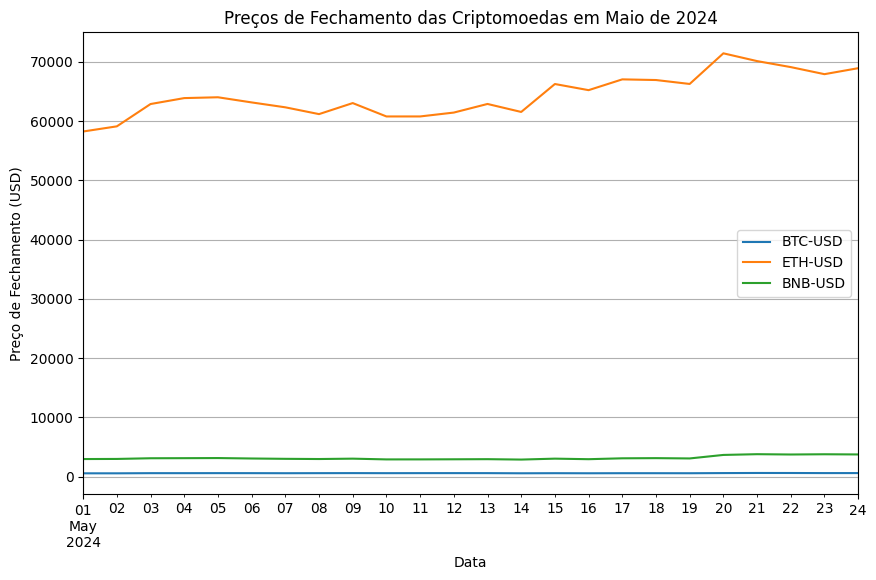

In [44]:
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de símbolos das criptomoedas
symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD']

# Baixar dados históricos do Yahoo Finance
crypto_data = yf.download(symbols, start='2024-05-01', end='2024-05-31', interval='1d')['Close']

# Plotar os dados
crypto_data.plot(figsize=(10, 6))
plt.title('Preços de Fechamento das Criptomoedas em Maio de 2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend(symbols)
plt.show()
